In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os
import scipy as sp  
from mpl_toolkits.mplot3d import axes3d 
import seaborn as sns 
from sklearn import datasets
from sklearn import preprocessing
from sklearn import model_selection as ms
from sklearn import linear_model
import math
  

In [2]:
def format_df(file):
    df = pd.read_csv(file, sep='\t', header=0, index_col=0)
    df = df.dropna(axis=1, how='all')
    col_mean = np.zeros((len(df.columns)))
    for i in range(len(df.columns)):
        col_mean[i] = df.iloc[:,i].mean()
        df.iloc[:,i] = df.iloc[:,i].fillna(value=col_mean[i])
    df = df.T
    return(df)
    
LU_file = r'C:\Users\vl2g15\Documents\Computational Biology\Coursework\TCGA-LUAD.methylation27.tsv\TCGA-LUAD.methylation27.txt'
OV_file = r'C:\Users\vl2g15\Documents\Computational Biology\Coursework\TCGA-OV.methylation27.tsv\TCGA-OV.methylation27.txt'
LU_df = format_df(LU_file)
OV_df = format_df(OV_file)

LU_df['Label'] = 'LU'
OV_df['Label'] = 'OV'

canc_df = pd.concat([LU_df, OV_df])

scaler = preprocessing.StandardScaler()

X = canc_df.iloc[:,0:-1]
y = canc_df.iloc[:,-1]
X_scaled = scaler.fit_transform(X)
clf = linear_model.LogisticRegression(solver='sag') # SGD

cv_res = ms.cross_validate(clf,X_scaled,y,cv=ms.StratifiedKFold(5)) # Default is stratified k-fold
print(cv_res['test_score'],cv_res['fit_time'])


C:\Apps\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Apps\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Apps\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Apps\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[0.98039216 0.9869281  0.97385621 0.99342105 0.97368421] [40.02420068 44.4307611  43.97213316 48.585325   49.5890131 ]


C:\Apps\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [3]:
from sklearn import feature_selection as feat_sel

sel = feat_sel.VarianceThreshold()
print(X_scaled.shape,sel.fit_transform(X).shape)


(763, 27578) (763, 27578)


In [4]:
clf_saga = linear_model.LogisticRegression(penalty='l1',class_weight='balanced',solver='saga')
clf_saga_fit = clf_saga.fit(X_scaled,y)
model = feat_sel.SelectFromModel(clf_saga_fit, prefit=True)

def post_sel_df(selector,dataframe): # Dataframe after feature selection
    features_idx = selector.get_support(indices = True) 
    new_features = dataframe.columns[features_idx]
    new_df = dataframe[new_features]
    return new_df

df_LR = post_sel_df(model,X)

X_LR = model.transform(X_scaled) # df.values of transformed dataframe
X_LR.shape

C:\Apps\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


(763, 15101)

In [5]:
cv_res_2 = ms.cross_val_score(clf_saga,X_LR,y,cv=ms.StratifiedKFold(5))
df_LR.head()

C:\Apps\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Apps\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Apps\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Apps\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Apps\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not conver

,cg00002426,cg00005847,cg00007981,cg00008713,cg00009407,cg00010193,cg00011459,cg00012386,cg00013618,cg00014085,...,cg27638597,cg27638713,cg27641018,cg27643859,cg27644292,cg27652350,cg27653134,cg27654142,cg27657249,cg27665659
TCGA-17-Z005-01A,0.657207,0.493210,0.051576,0.010488,0.012301,0.772716,0.908831,0.017907,0.667537,0.021948,...,0.092148,0.032723,0.882698,0.933167,0.359880,0.372849,0.739767,0.153157,0.147443,0.054017
TCGA-67-3774-01A,0.293404,0.460441,0.045938,0.012561,0.011137,0.547905,0.930882,0.015853,0.794353,0.015569,...,0.020386,0.048912,0.820843,0.944808,0.220209,0.447366,0.627968,0.174885,0.202301,0.019594
TCGA-73-4668-11A,0.474855,0.197529,0.068710,0.012986,0.012805,0.663715,0.953667,0.023248,0.807894,0.013743,...,0.024075,0.032163,0.861591,0.944381,0.475652,0.159622,0.710304,0.106848,0.221842,0.070150
TCGA-49-4510-11A,0.382004,0.140292,0.045383,0.010167,0.007922,0.718815,0.953364,0.025994,0.870457,0.011530,...,0.017489,0.030875,0.888606,0.958168,0.482565,0.092661,0.749766,0.026033,0.221599,0.073769
TCGA-05-4430-01A,0.383398,0.479340,0.059871,0.009965,0.008913,0.695658,0.952525,0.026988,0.690647,0.012759,...,0.016333,0.023108,0.884219,0.948432,0.411338,0.398430,0.597427,0.052175,0.254175,0.027294


In [6]:
print(cv_res_2)


[0.9869281  1.         0.98039216 1.         0.97368421]


[[1.         0.12542909 0.23269735 ... 0.27536864 0.31549458 0.2705905 ]
 [0.12542909 1.         0.08112046 ... 0.09897124 0.10585919 0.22484392]
 [0.23269735 0.08112046 1.         ... 0.33333992 0.27344505 0.15613038]
 ...
 [0.27536864 0.09897124 0.33333992 ... 1.         0.26641825 0.17841676]
 [0.31549458 0.10585919 0.27344505 ... 0.26641825 1.         0.35605393]
 [0.2705905  0.22484392 0.15613038 ... 0.17841676 0.35605393 1.        ]]


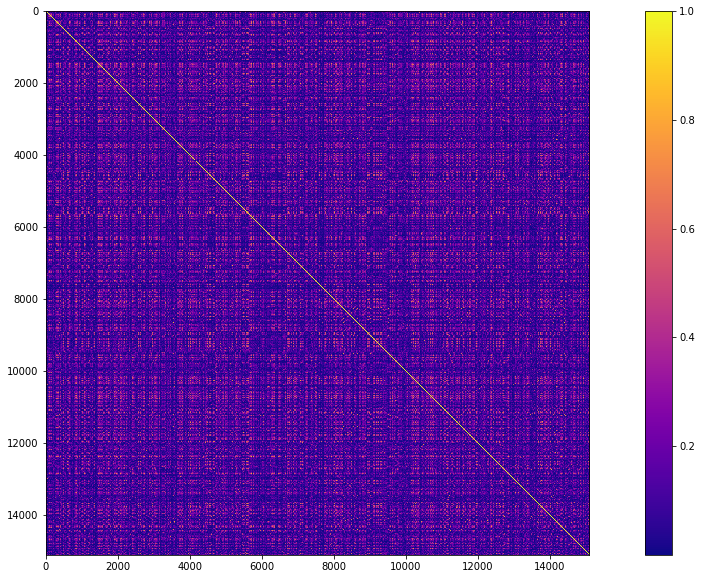

In [7]:
corr_matrix = np.abs(np.corrcoef(X_LR,rowvar=False))
print(corr_matrix)
f1,ax1 = plt.subplots(1,1,figsize=(20,10))
plt.imshow(corr_matrix,cmap='plasma')
plt.colorbar()

In [8]:
corr_matrix = np.tril(corr_matrix, k=-1) # Return lower triangle
print(corr_matrix)
corr_idx = np.where(corr_matrix > 0.8)
print(corr_idx)


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.12542909 0.         0.         ... 0.         0.         0.        ]
 [0.23269735 0.08112046 0.         ... 0.         0.         0.        ]
 ...
 [0.27536864 0.09897124 0.33333992 ... 0.         0.         0.        ]
 [0.31549458 0.10585919 0.27344505 ... 0.26641825 0.         0.        ]
 [0.2705905  0.22484392 0.15613038 ... 0.17841676 0.35605393 0.        ]]
(array([  105,   129,   137, ..., 15096, 15097, 15098], dtype=int64), array([   56,     4,     4, ..., 11739,  1886,  5123], dtype=int64))


In [10]:
X_corr = np.delete(X_LR, corr_idx[0], 1)
df_corr = df_LR.drop(df_LR.columns[corr_idx[0]],axis=1)
print(X_corr.shape)

(763, 12919)


In [11]:
df_corr.head()

,cg00002426,cg00005847,cg00007981,cg00008713,cg00009407,cg00010193,cg00011459,cg00012386,cg00013618,cg00014085,...,cg27631817,cg27634151,cg27635271,cg27635983,cg27638713,cg27641018,cg27643859,cg27644292,cg27657249,cg27665659
TCGA-17-Z005-01A,0.657207,0.493210,0.051576,0.010488,0.012301,0.772716,0.908831,0.017907,0.667537,0.021948,...,0.182263,0.370569,0.658877,0.035336,0.032723,0.882698,0.933167,0.359880,0.147443,0.054017
TCGA-67-3774-01A,0.293404,0.460441,0.045938,0.012561,0.011137,0.547905,0.930882,0.015853,0.794353,0.015569,...,0.176301,0.084064,0.300245,0.013487,0.048912,0.820843,0.944808,0.220209,0.202301,0.019594
TCGA-73-4668-11A,0.474855,0.197529,0.068710,0.012986,0.012805,0.663715,0.953667,0.023248,0.807894,0.013743,...,0.338616,0.141963,0.463366,0.020019,0.032163,0.861591,0.944381,0.475652,0.221842,0.070150
TCGA-49-4510-11A,0.382004,0.140292,0.045383,0.010167,0.007922,0.718815,0.953364,0.025994,0.870457,0.011530,...,0.318359,0.045318,0.366959,0.011698,0.030875,0.888606,0.958168,0.482565,0.221599,0.073769
TCGA-05-4430-01A,0.383398,0.479340,0.059871,0.009965,0.008913,0.695658,0.952525,0.026988,0.690647,0.012759,...,0.218195,0.356468,0.400236,0.012499,0.023108,0.884219,0.948432,0.411338,0.254175,0.027294


In [12]:
cv_res_3 = ms.cross_val_score(clf_saga,X_corr,y,cv=ms.StratifiedKFold(5))
print(cv_res_3)

C:\Apps\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Apps\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Apps\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Apps\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[0.9869281  1.         0.98039216 0.99342105 0.97368421]


C:\Apps\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [13]:
le = preprocessing.LabelEncoder()
le.fit(y)
print(list(le.classes_))
y_enc = le.transform(y)
print(y_enc)

['LU', 'OV']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1

In [48]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=1)

skf = ms.StratifiedKFold(n_splits=5)
print('Cross Val Score on DT from split dataset: ')
for train_id, test_id in skf.split(X_corr,y_enc):
        X_train, X_test = X_corr[train_id,:], X_corr[test_id,:]
        y_train, y_test = y_enc[train_id], y_enc[test_id]
        tree_fit = clf_tree.fit(X_train,y_train)
        print(tree_fit.score(X_test,y_test))      
cv_res_tree = ms.cross_val_score(clf_tree,X_corr,y_enc,cv=ms.StratifiedKFold(5))
print('Cross Val Score on Decision Tree: ',cv_res_tree)

Cross Val Score on DT from split dataset: 
0.9803921568627451
0.9803921568627451
0.9738562091503268
0.9868421052631579
0.993421052631579
Cross Val Score on Decision Tree:  [0.98039216 0.97385621 0.96732026 0.98026316 0.98026316]


In [49]:
with open("cancer_clf_tree.txt", "w") as f:
    f = tree.export_graphviz(tree_fit, out_file=f, feature_names=df_corr.columns.values, class_names=list(le.classes_),\
                                  filled=True, rounded=True, special_characters=True)

In [50]:
tree_sel = feat_sel.SelectFromModel(tree_fit, prefit=True)
X_DT = tree_sel.transform(X_corr)
X_DT.shape

(763, 5)

In [51]:
df_DT = post_sel_df(tree_sel,df_corr)
df_DT.head()

,cg00037940,cg01965939,cg09259332,cg10089145,cg18994063
TCGA-17-Z005-01A,0.905754,0.415373,0.043294,0.178576,0.404354
TCGA-67-3774-01A,0.894898,0.193107,0.022709,0.099532,0.289827
TCGA-73-4668-11A,0.932632,0.207730,0.046449,0.350849,0.456347
TCGA-49-4510-11A,0.942162,0.130536,0.027813,0.318557,0.448780
TCGA-05-4430-01A,0.937416,0.202650,0.043547,0.231740,0.458501


In [52]:
post_cv_res_tree = ms.cross_val_score(clf_tree,X_DT,y_enc,cv=ms.StratifiedKFold(5))
print('Post-Transform CV Score on Decision Tree: ', post_cv_res_tree)


Post-Transform CV Score on Decision Tree:  [0.9869281  0.9869281  0.98039216 0.98684211 0.99342105]


In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

clf_LDA = LDA(n_components=2)

print('Cross Val Score on LDA from split dataset: ')
for train_id, test_id in skf.split(X_DT,y):
        X_train, X_test = X_DT[train_id,:], X_DT[test_id,:]
        y_train, y_test = y[train_id], y[test_id]
        LDA_fit = clf_LDA.fit(X_train,y_train)
        print(LDA_fit.score(X_test,y_test))
cv_res_LDA = ms.cross_val_score(clf_LDA,X_DT,y_enc,cv=ms.StratifiedKFold(5))
print('Cross Val Score on Decision Tree: ',cv_res_LDA)

Cross Val Score on LDA from split dataset: 
0.9869281045751634
0.9934640522875817
1.0
0.9736842105263158
0.9802631578947368
Cross Val Score on Decision Tree:  [0.9869281  0.99346405 1.         0.97368421 0.98026316]


In [62]:
X_LDA = LDA_fit.transform(X_DT)

763